# Fashion Dataset and Architecture Comparisons

In [2]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, random_split
import torchvision
from torchsummaryX import summary
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
home = os.environ.get('HOME')
root = os.path.join(home, 'public/data')
dataset = torchvision.datasets.FashionMNIST(
    root,
    train=True,
    transform=torchvision.transforms.ToTensor())

dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/jovyan/public/data
    Split: Train
    StandardTransform
Transform: ToTensor()

The first image is of shape: torch.Size([1, 28, 28])
The first label is: 9


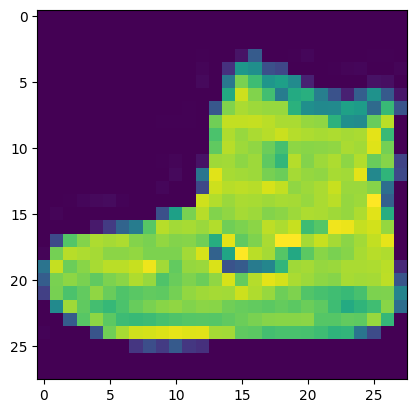

In [4]:
# Print out important stats about the dataset

image_tensor, label = dataset[0]
print("The first image is of shape:", image_tensor.shape)
print("The first label is:", label)

plt.imshow(np.transpose(image_tensor, (1, 2, 0)));

The dataset object has a `.classes` field that contains the names of
the different labels.  It has 10 classes ranging from **T-shirt** to **Ankle boot**.

In [5]:
# Print the lookup

lookup = pd.Series({x: i for (i,x) in enumerate(dataset.classes)})
lookup

T-shirt/top    0
Trouser        1
Pullover       2
Dress          3
Coat           4
Sandal         5
Shirt          6
Sneaker        7
Bag            8
Ankle boot     9
dtype: int64

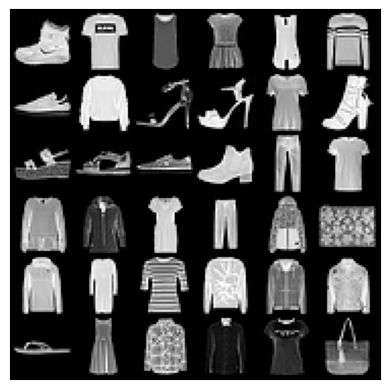

In [6]:
xs = dataset.data[:36]
xs = xs.reshape(36, 1, 28, 28)
mosiac = torchvision.utils.make_grid(xs, nrow=6)
mosiac = np.transpose(mosiac, (1, 2, 0))
plt.imshow(mosiac)
plt.xticks([])
plt.yticks([]);

In [7]:
train_dataset, val_dataset = random_split(dataset, (0.8, 0.2))
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)

## Linear classifier


In [ ]:
class MyLinear(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(10)
        )
        
    def forward(self, image):
        return self.model(image)

In [ ]:
# Linear model architecture

m = MyLinear()
xs, ys = next(iter(train_dataloader))
summary(m, xs);

                     Kernel Shape Output Shape Params Mult-Adds
Layer                                                          
0_model.Flatten_0               -    [32, 784]      -         -
1_model.LazyLinear_1    [784, 10]     [32, 10]  7.85k     7.84k
-----------------------------------------------------------------
                      Totals
Total params           7.85k
Trainable params       7.85k
Non-trainable params     0.0
Mult-Adds              7.84k


In [ ]:

import trainer_lib
reload(trainer_lib)
trainer = trainer_lib.Trainer(m, train_dataloader, val_dataloader)
print(trainer is not None)

True


In [ ]:
# Check trainer methods
for method in ['train_one_epoch', 'val_one_epoch', 'train', 'reset']:
    print(f"trainer.{method}?", hasattr(trainer, method))

trainer.train_one_epoch? True
trainer.val_one_epoch? True
trainer.train? True
trainer.reset? True


In [ ]:
# Check trainer.train_one_epoch

(loss, acc) = trainer.train_one_epoch(max_batches=1)
print('loss is numeric', isinstance(loss, float))
print('acc is numeric', isinstance(acc, float))

loss is numeric True
acc is numeric True


In [ ]:
#Check trainer.val_one_epoch

(loss, acc) = trainer.val_one_epoch()
print('loss is numeric', isinstance(loss, float))
print('acc is numeric', isinstance(acc, float))

loss is numeric True
acc is numeric True


In [ ]:
# Check trainer.reset

trainer.reset()
print("Ok")

Ok


In [ ]:
reload(trainer_lib)
model_linear = MyLinear()
trainer = trainer_lib.Trainer(model_linear, train_dataloader, val_dataloader)
trainer.reset()
model_linear_log = trainer.train(epochs=20, max_batches=10)
model_linear_log.round(2)

[0 (3.79s)]: train_loss=2.03 train_acc=0.33, val_loss=1.81 val_acc=0.38
[1 (3.10s)]: train_loss=1.65 train_acc=0.48, val_loss=1.47 val_acc=0.58
[2 (3.61s)]: train_loss=1.37 train_acc=0.64, val_loss=1.27 val_acc=0.61
[3 (3.29s)]: train_loss=1.22 train_acc=0.63, val_loss=1.14 val_acc=0.64
[4 (3.60s)]: train_loss=1.15 train_acc=0.62, val_loss=1.05 val_acc=0.68
[5 (2.90s)]: train_loss=0.98 train_acc=0.68, val_loss=0.99 val_acc=0.67
[6 (3.19s)]: train_loss=0.97 train_acc=0.65, val_loss=0.95 val_acc=0.67
[7 (3.65s)]: train_loss=0.94 train_acc=0.69, val_loss=0.92 val_acc=0.69
[8 (3.53s)]: train_loss=0.92 train_acc=0.71, val_loss=0.89 val_acc=0.71
[9 (3.22s)]: train_loss=0.89 train_acc=0.70, val_loss=0.88 val_acc=0.69
[10 (3.60s)]: train_loss=0.85 train_acc=0.71, val_loss=0.84 val_acc=0.72
[11 (3.10s)]: train_loss=0.84 train_acc=0.73, val_loss=0.82 val_acc=0.74
[12 (3.03s)]: train_loss=0.87 train_acc=0.71, val_loss=0.80 val_acc=0.74
[13 (3.37s)]: train_loss=0.78 train_acc=0.74, val_loss=0.79 v

,train_loss,train_accuracy,val_loss,val_accuracy,epoch_duration
0,2.03,0.33,1.81,0.38,3.79
1,1.65,0.48,1.47,0.58,3.10
2,1.37,0.64,1.27,0.62,3.61
3,1.22,0.63,1.14,0.64,3.29
4,1.15,0.62,1.05,0.68,3.60
5,0.98,0.68,0.99,0.67,2.90
6,0.97,0.65,0.95,0.67,3.19
7,0.94,0.69,0.92,0.69,3.65
8,0.92,0.71,0.89,0.71,3.53
9,0.89,0.70,0.88,0.69,3.22


## MLP Model

In [ ]:
class MLPModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(50),
            nn.ReLU(),
            nn.Linear(50,10)
        )
        
    def forward(self, x):
        return self.model(x)

In [ ]:
# MLP model architecture

model_mlp = MLPModel()
summary(model_mlp, xs);

                     Kernel Shape Output Shape  Params Mult-Adds
Layer                                                           
0_model.Flatten_0               -    [32, 784]       -         -
1_model.LazyLinear_1    [784, 50]     [32, 50]  39.25k     39.2k
2_model.ReLU_2                  -     [32, 50]       -         -
3_model.Linear_3         [50, 10]     [32, 10]   510.0     500.0
------------------------------------------------------------------
                      Totals
Total params          39.76k
Trainable params      39.76k
Non-trainable params     0.0
Mult-Adds              39.7k


## Training MLP

We will train the MLP model in 20 epochs with 10 batches per epoch.

In [ ]:
model_mlp = MLPModel()
reload(trainer_lib)
trainer = trainer_lib.Trainer(model_mlp, train_dataloader, val_dataloader)
trainer.reset()
model_mlp_log = trainer.train(epochs=20, max_batches=10)
model_mlp_log.round(2)

[0 (3.41s)]: train_loss=2.15 train_acc=0.32, val_loss=2.04 val_acc=0.39
[1 (3.60s)]: train_loss=1.90 train_acc=0.49, val_loss=1.71 val_acc=0.54
[2 (3.41s)]: train_loss=1.57 train_acc=0.58, val_loss=1.40 val_acc=0.65
[3 (4.19s)]: train_loss=1.26 train_acc=0.63, val_loss=1.20 val_acc=0.61
[4 (4.60s)]: train_loss=1.13 train_acc=0.66, val_loss=1.07 val_acc=0.65
[5 (3.21s)]: train_loss=1.09 train_acc=0.63, val_loss=0.96 val_acc=0.69
[6 (5.40s)]: train_loss=0.92 train_acc=0.71, val_loss=0.91 val_acc=0.68
[7 (3.10s)]: train_loss=0.89 train_acc=0.68, val_loss=0.86 val_acc=0.67
[8 (3.61s)]: train_loss=0.88 train_acc=0.70, val_loss=0.86 val_acc=0.68
[9 (4.80s)]: train_loss=0.85 train_acc=0.67, val_loss=0.81 val_acc=0.72
[10 (2.83s)]: train_loss=0.76 train_acc=0.74, val_loss=0.78 val_acc=0.71
[11 (4.87s)]: train_loss=0.70 train_acc=0.76, val_loss=0.75 val_acc=0.72
[12 (3.10s)]: train_loss=0.78 train_acc=0.71, val_loss=0.74 val_acc=0.73
[13 (3.39s)]: train_loss=0.74 train_acc=0.75, val_loss=0.73 v

,train_loss,train_accuracy,val_loss,val_accuracy,epoch_duration
0,2.15,0.32,2.04,0.39,3.41
1,1.90,0.49,1.71,0.54,3.60
2,1.57,0.58,1.40,0.65,3.41
3,1.26,0.63,1.20,0.61,4.19
4,1.13,0.66,1.07,0.65,4.60
5,1.09,0.63,0.96,0.69,3.21
6,0.92,0.71,0.91,0.68,5.40
7,0.89,0.68,0.86,0.67,3.10
8,0.88,0.70,0.86,0.68,3.61
9,0.85,0.67,0.81,0.72,4.80


## Convolution based networks

In [ ]:
class LinearCNNModel(nn.Module):
    def __init__(self, num_kernels, kernel_size, pool_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=num_kernels, kernel_size=kernel_size),
            nn.MaxPool2d(kernel_size=pool_size),
            nn.ReLU(),
            nn.Flatten(),
            nn.LazyLinear(10)
        )
        
    def forward(self, x):
        return self.model(x)

We will construct a convolutional network with 5 kernels, with kernel size 3, and pooling size of 2.

In [ ]:
# CNN Linear architecture

model_cnn_linear = LinearCNNModel(5, 3, 2)
summary(model_cnn_linear, xs);

                      Kernel Shape     Output Shape Params Mult-Adds
Layer                                                               
0_model.Conv2d_0      [1, 5, 3, 3]  [32, 5, 26, 26]   50.0    30.42k
1_model.MaxPool2d_1              -  [32, 5, 13, 13]      -         -
2_model.ReLU_2                   -  [32, 5, 13, 13]      -         -
3_model.Flatten_3                -        [32, 845]      -         -
4_model.LazyLinear_4     [845, 10]         [32, 10]  8.46k     8.45k
----------------------------------------------------------------------
                      Totals
Total params           8.51k
Trainable params       8.51k
Non-trainable params     0.0
Mult-Adds             38.87k


## Training of Convolutional Network

We will train a convolutional network using 20 epochs, and 10 batches per epoch.

In [ ]:
reload(trainer_lib)
trainer = trainer_lib.Trainer(model_cnn_linear, train_dataloader, val_dataloader)
trainer.reset()
model_cnn_linear_log = trainer.train(epochs=20, max_batches=10)
model_cnn_linear_log.round(2)

[0 (6.57s)]: train_loss=2.22 train_acc=0.15, val_loss=2.11 val_acc=0.36
[1 (7.30s)]: train_loss=2.01 train_acc=0.54, val_loss=1.89 val_acc=0.57
[2 (6.60s)]: train_loss=1.79 train_acc=0.61, val_loss=1.66 val_acc=0.62
[3 (6.50s)]: train_loss=1.56 train_acc=0.66, val_loss=1.45 val_acc=0.66
[4 (5.60s)]: train_loss=1.37 train_acc=0.66, val_loss=1.27 val_acc=0.67
[5 (5.80s)]: train_loss=1.20 train_acc=0.66, val_loss=1.13 val_acc=0.68
[6 (6.11s)]: train_loss=1.01 train_acc=0.75, val_loss=1.00 val_acc=0.70
[7 (6.80s)]: train_loss=0.99 train_acc=0.67, val_loss=0.93 val_acc=0.70
[8 (6.69s)]: train_loss=0.90 train_acc=0.70, val_loss=0.85 val_acc=0.73
[9 (6.10s)]: train_loss=0.86 train_acc=0.72, val_loss=0.81 val_acc=0.72
[10 (6.30s)]: train_loss=0.76 train_acc=0.76, val_loss=0.77 val_acc=0.74
[11 (6.50s)]: train_loss=0.76 train_acc=0.72, val_loss=0.74 val_acc=0.75
[12 (6.70s)]: train_loss=0.73 train_acc=0.75, val_loss=0.74 val_acc=0.73
[13 (6.39s)]: train_loss=0.72 train_acc=0.76, val_loss=0.71 v

,train_loss,train_accuracy,val_loss,val_accuracy,epoch_duration
0,2.22,0.15,2.11,0.36,6.57
1,2.01,0.54,1.89,0.57,7.30
2,1.79,0.61,1.66,0.62,6.60
3,1.56,0.66,1.45,0.66,6.50
4,1.37,0.66,1.27,0.67,5.60
5,1.20,0.66,1.13,0.68,5.80
6,1.01,0.75,1.00,0.70,6.11
7,0.99,0.67,0.93,0.70,6.80
8,0.90,0.70,0.85,0.73,6.69
9,0.86,0.72,0.81,0.72,6.10


## Deep Conv model

In [ ]:
class DeepCNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels= 1, out_channels= 16, kernel_size= 5, padding= 'same'),
            nn.MaxPool2d(kernel_size= 2),
            nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size= 3, padding= 'same'),
            nn.MaxPool2d(kernel_size= 2),
            nn.Flatten(),
            nn.Linear(1568,50),
            nn.ReLU(),
            nn.Linear(50, 10)
        )
        
    def forward(self, x):
        return self.model(x)

In [ ]:
# Deep cnn architecture

model_cnn_deep = DeepCNNModel()
summary(model_cnn_deep, xs);

                       Kernel Shape      Output Shape  Params Mult-Adds
Layer                                                                  
0_model.Conv2d_0      [1, 16, 5, 5]  [32, 16, 28, 28]   416.0    313.6k
1_model.MaxPool2d_1               -  [32, 16, 14, 14]       -         -
2_model.Conv2d_2     [16, 32, 3, 3]  [32, 32, 14, 14]   4.64k  903.168k
3_model.MaxPool2d_3               -    [32, 32, 7, 7]       -         -
4_model.Flatten_4                 -        [32, 1568]       -         -
5_model.Linear_5         [1568, 50]          [32, 50]  78.45k     78.4k
6_model.ReLU_6                    -          [32, 50]       -         -
7_model.Linear_7           [50, 10]          [32, 10]   510.0     500.0
-------------------------------------------------------------------------
                         Totals
Total params            84.016k
Trainable params        84.016k
Non-trainable params        0.0
Mult-Adds             1.295668M


## Training the deep CNN network

In [ ]:
reload(trainer_lib)
trainer = trainer_lib.Trainer(model_cnn_deep, train_dataloader, val_dataloader)
trainer.reset()
model_cnn_deep_log = trainer.train(epochs=20, max_batches=10)
model_cnn_deep_log.round(2)

[0 (12.11s)]: train_loss=2.15 train_acc=0.26, val_loss=1.94 val_acc=0.31
[1 (11.69s)]: train_loss=1.65 train_acc=0.43, val_loss=1.36 val_acc=0.54
[2 (12.30s)]: train_loss=1.23 train_acc=0.55, val_loss=1.05 val_acc=0.61
[3 (11.80s)]: train_loss=1.11 train_acc=0.61, val_loss=0.98 val_acc=0.54
[4 (12.11s)]: train_loss=0.88 train_acc=0.64, val_loss=0.86 val_acc=0.68
[5 (11.70s)]: train_loss=0.90 train_acc=0.71, val_loss=0.77 val_acc=0.74
[6 (11.49s)]: train_loss=0.91 train_acc=0.68, val_loss=0.76 val_acc=0.72
[7 (12.10s)]: train_loss=0.74 train_acc=0.74, val_loss=0.70 val_acc=0.75
[8 (11.40s)]: train_loss=0.69 train_acc=0.73, val_loss=0.66 val_acc=0.75
[9 (11.30s)]: train_loss=0.69 train_acc=0.75, val_loss=0.68 val_acc=0.75
[10 (11.71s)]: train_loss=0.73 train_acc=0.74, val_loss=0.67 val_acc=0.75
[11 (11.69s)]: train_loss=0.71 train_acc=0.71, val_loss=0.71 val_acc=0.73
[12 (11.51s)]: train_loss=0.71 train_acc=0.74, val_loss=0.63 val_acc=0.77
[13 (12.30s)]: train_loss=0.65 train_acc=0.74, v

,train_loss,train_accuracy,val_loss,val_accuracy,epoch_duration
0,2.15,0.26,1.94,0.31,12.11
1,1.65,0.43,1.36,0.54,11.69
2,1.23,0.55,1.05,0.61,12.30
3,1.11,0.61,0.98,0.54,11.80
4,0.88,0.64,0.86,0.68,12.11
5,0.90,0.71,0.77,0.74,11.70
6,0.91,0.68,0.76,0.72,11.49
7,0.74,0.74,0.70,0.75,12.10
8,0.69,0.73,0.66,0.75,11.40
9,0.69,0.75,0.68,0.75,11.30


## Plot

The following plots the training accuracy.

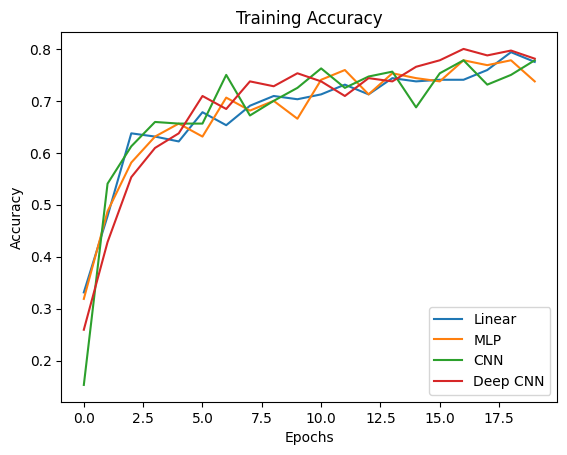

In [ ]:
plt.figure()
plt.plot(model_linear_log.index, model_linear_log.train_accuracy)
plt.plot(model_mlp_log.index, model_mlp_log.train_accuracy)
plt.plot(model_cnn_linear_log.index, model_cnn_linear_log.train_accuracy)
plt.plot(model_cnn_deep_log.index, model_cnn_deep_log.train_accuracy)

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Linear', 'MLP', 'CNN', 'Deep CNN']);

### Plot the validation accuracy

Make sure you properly label the plot and the axes.

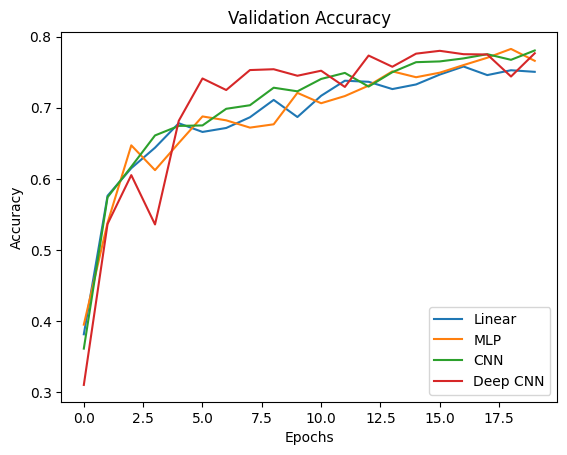

In [ ]:
#
# Generate the validation accuracy of the different models
#

plt.figure()
plt.plot(model_linear_log.index, model_linear_log.val_accuracy)
plt.plot(model_mlp_log.index, model_mlp_log.val_accuracy)
plt.plot(model_cnn_linear_log.index, model_cnn_linear_log.val_accuracy)
plt.plot(model_cnn_deep_log.index, model_cnn_deep_log.val_accuracy)

plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Linear', 'MLP', 'CNN', 'Deep CNN']);